# Análise Preditiva de Acesso a Recursos (Amazon) - Equipe 2

## CRISP-DM Phase 2: Data Understanding (Análise Exploratória de Dados - EDA)

### Objetivo
Analisar os dados de acesso a recursos da Amazon para identificar padrões, tendências e características dos dados que influenciam as decisões de concessão de acesso, incluindo verificação da qualidade dos dados, análise da distribuição das variáveis, identificação de correlações e insights para subsidiar a modelagem preditiva.

### Informações do Dataset
- **Fonte**: Amazon Employee Access Challenge
- **Problema**: Classificação binária (0 = Acesso Negado, 1 = Acesso Permitido)
- **Dados de Treinamento**: 32.769 registros

## Sumário da Análise

### **Estrutura do Notebook:**
- **0. Configurações Iniciais** - Importação de bibliotecas e configurações
- **1. Carregamento e Visualização dos Dados** - Carregamento e primeira visualização
- **2. Verificação da Qualidade dos Dados** - Valores ausentes, duplicados e tipos de dados
- **3. Análise Exploratória dos Dados (EDA)** - Estatísticas, visualizações e padrões
- **4. Considerações Finais** - Conclusões e próximos passos

---

## 0. Configurações Iniciais

### 0.1 Importação de Bibliotecas e Configurações

In [2]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Modelos
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Configurações para visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Carregamento e Visualização dos Dados

Nesta seção, realizamos o carregamento dos dados de treinamento e fazemos uma primeira visualização da estrutura do dataset.

### 1.1 Carregamento e Separação dos Dados (Treino + Teste)

In [3]:
# Carregamento dos dados de treinamento
train_df = pd.read_csv('data/train.csv')

# Separar features e target
X = train_df.drop(columns=['ACTION'])
y = train_df['ACTION']

# (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [ ]:
X_train.shape, X_test.shape

((26215, 9), (6554, 9))

In [ ]:
# Visualização do head de treino
X_train.head()

,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
10137,75834,3253,117961,118446,120317,208126,133698,124487,208127
26537,105046,70062,117961,118386,118746,117905,117906,290919,117908
25420,81465,43,119920,119921,119922,118321,117906,290919,118322
8690,17249,4950,117961,118343,119598,120006,310997,118424,120008
12147,45300,59765,117961,118386,121961,124152,304629,118424,124154


## 2. Verificação da Qualidade dos Dados

Antes de qualquer análise exploratória, é fundamental verificar a qualidade dos dados para identificar possíveis problemas como valores ausentes, duplicados ou inconsistências que possam afetar a análise.

### 2.1 Estrutura Geral do Dataset

In [4]:
# Análise da estrutura dos dados de treino após divisão
print("INFORMAÇÕES GERAIS")
print(f"Dimensões: {X_train.shape}")
print(f"Tipos de dados:\n{X_train.dtypes}")
print(f"Memória utilizada: {X_train.memory_usage().sum() / 1024**2:.2f} MB")

# Separar variáveis preditoras e target
features = list(X_train.columns)
target = 'ACTION'

print(f"\nVariável target: {target}")
print(f"Variáveis preditoras: {features}")
print(f"Número de variáveis preditoras: {len(X_train.columns)}")
print(f"Tamanho de y_train: {y_train.shape}")

INFORMAÇÕES GERAIS
Dimensões: (26215, 9)
Tipos de dados:
RESOURCE            int64
MGR_ID              int64
ROLE_ROLLUP_1       int64
ROLE_ROLLUP_2       int64
ROLE_DEPTNAME       int64
ROLE_TITLE          int64
ROLE_FAMILY_DESC    int64
ROLE_FAMILY         int64
ROLE_CODE           int64
dtype: object
Memória utilizada: 2.00 MB

Variável target: ACTION
Variáveis preditoras: ['RESOURCE', 'MGR_ID', 'ROLE_ROLLUP_1', 'ROLE_ROLLUP_2', 'ROLE_DEPTNAME', 'ROLE_TITLE', 'ROLE_FAMILY_DESC', 'ROLE_FAMILY', 'ROLE_CODE']
Número de variáveis preditoras: 9
Tamanho de y_train: (26215,)


### 2.2 Verificação de Valores Ausentes e Duplicados

In [5]:
# Verificação de valores ausentes
print("\nVALORES AUSENTES")
missing_values = X_train.isnull().sum()
total_missing = missing_values.sum()

if total_missing == 0:
    print("Nenhum valor ausente encontrado!")
else:
    print(f"Total de valores ausentes: {total_missing}")
    print("\nPor variável:")
    for col, missing in missing_values.items():
        if missing > 0:
            percentage = (missing / len(X_train)) * 100
            print(f"  {col}: {missing} ({percentage:.2f}%)")

# Verificação de valores nulos/duplicados
print("\nVALORES DUPLICADOS")
duplicates = X_train.duplicated().sum()
if duplicates == 0:
    print("Nenhum registro duplicado encontrado!")
else:
    print(f"{duplicates} registros duplicados encontrados")

# Resumo geral
print(f"\nRESUMO GERAL")
print(f"Total de registros: {len(X_train):,}")
print(f"Total de variáveis: {len(X_train.columns)}")
print(f"Valores ausentes: {total_missing}")
print(f"Registros duplicados: {duplicates}")

if total_missing == 0 and duplicates == 0:
    print("\nDados prontos para análise")
else:
    print("\nDados requerem limpeza antes da modelagem")


VALORES AUSENTES
Nenhum valor ausente encontrado!

VALORES DUPLICADOS
Nenhum registro duplicado encontrado!

RESUMO GERAL
Total de registros: 26,215
Total de variáveis: 9
Valores ausentes: 0
Registros duplicados: 0

Dados prontos para análise


### 2.3 Análise de Tipos de Dados e contagem de valores únicos

In [6]:
# Verificação dos tipos de dados e valores únicos
print("\nIPOS DE DADOS E VALORES ÚNICOS")

# Informações dos tipos de dados
print("Tipos de dados:")
for col in X_train.columns:
    dtype = X_train[col].dtype
    unique_count = X_train[col].nunique()
    print(f"  {col}: {dtype} ({unique_count} valores únicos)")

# Verificação específica da variável target
print(f"\nVARIÁVEL TARGET (ACTION)")
target_counts = y_train.value_counts()
print(f"Distribuição da variável target:")
for value, count in target_counts.items():
    percentage = (count / len(X_train)) * 100
    print(f"  {value}: {count} ({percentage:.2f}%)")


IPOS DE DADOS E VALORES ÚNICOS
Tipos de dados:
  RESOURCE: int64 (6694 valores únicos)
  MGR_ID: int64 (4034 valores únicos)
  ROLE_ROLLUP_1: int64 (124 valores únicos)
  ROLE_ROLLUP_2: int64 (172 valores únicos)
  ROLE_DEPTNAME: int64 (443 valores únicos)
  ROLE_TITLE: int64 (333 valores únicos)
  ROLE_FAMILY_DESC: int64 (2211 valores únicos)
  ROLE_FAMILY: int64 (66 valores únicos)
  ROLE_CODE: int64 (333 valores únicos)

VARIÁVEL TARGET (ACTION)
Distribuição da variável target:
  1: 24697 (94.21%)
  0: 1518 (5.79%)


## 3. Análise Exploratória dos Dados 
Agora que verificamos a qualidade dos dados, vamos realizar uma análise exploratória detalhada das características do dataset, incluindo análise estatística, visualizações e identificação de padrões.

### 3.1 Estatísticas Descritivas e Análise da Variável Target

In [7]:
# Análise estatística básica das variáveis numéricas
print("\nESTATÍSTICAS DESCRITIVAS - DATASET DE TREINAMENTO")
print(X_train.describe())

# Análise da variável target
print("\nANÁLISE DA VARIÁVEL TARGET (ACTION)")
target_counts = y_train.value_counts()
target_props = y_train.value_counts(normalize=True)

print(f"Distribuição da variável target:")
for i, (count, prop) in enumerate(zip(target_counts, target_props)):
    print(f"  Classe {target_counts.index[i]}: {count} ({prop:.2%})")

print(f"\nBalanceamento das classes:")
print(f"  Diferença: {abs(target_props.iloc[0] - target_props.iloc[1]):.2%}")


ESTATÍSTICAS DESCRITIVAS - DATASET DE TREINAMENTO
            RESOURCE         MGR_ID  ROLE_ROLLUP_1  ROLE_ROLLUP_2  \
count   26215.000000   26215.000000   26215.000000   26215.000000   
mean    42963.522182   26143.865535  116918.969559  118317.654587   
std     34116.602243   36139.473758   10956.713052    4432.074674   
min         0.000000      25.000000    4292.000000   23779.000000   
25%     20336.500000    4576.000000  117961.000000  118102.000000   
50%     35398.000000   13782.000000  117961.000000  118300.000000   
75%     74196.000000   43456.000000  117961.000000  118386.000000   
max    312153.000000  311696.000000  311178.000000  286791.000000   

       ROLE_DEPTNAME     ROLE_TITLE  ROLE_FAMILY_DESC    ROLE_FAMILY  \
count   26215.000000   26215.000000      26215.000000   26215.000000   
mean   118865.056571  125926.727408     170152.374633  183718.905054   
std     18906.487798   31093.128228      69561.981291  100337.603845   
min      4674.000000  117879.000000    

### 3.2 Análise Individual da proporção da variável target

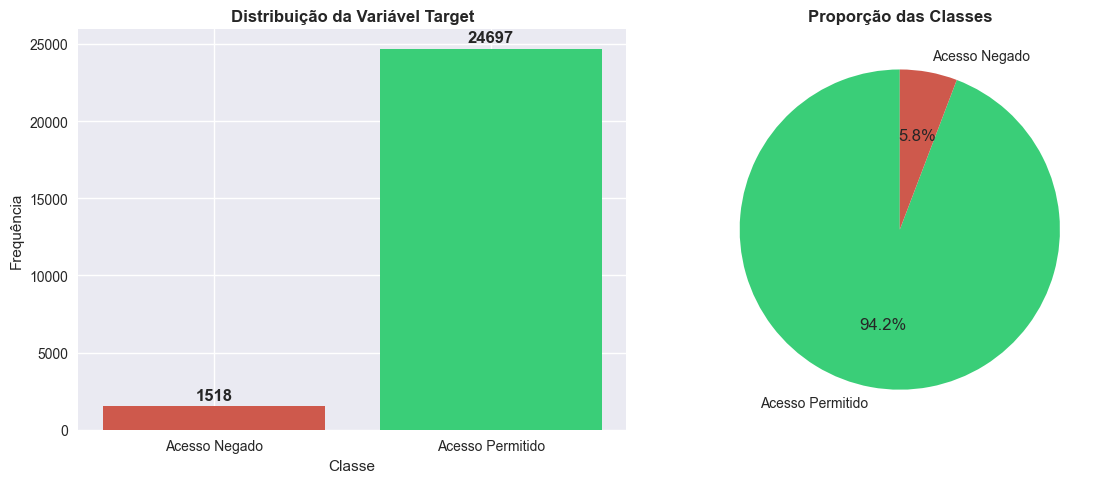

In [10]:
# Análise univariada das variáveis categóricas
categorical_vars = [col for col in X_train.columns]

# Visualização da distribuição da variável target
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Definir cores intuitivas: vermelho para negado, verde para permitido
colors = ["#3ACE78", "#CE594C"]  # Verde e Vermelho (invertido para barras)

# Gráfico de barras
target_counts = y_train.value_counts()
bars = axes[0].bar(target_counts.index, target_counts.values, color=colors)
axes[0].set_title('Distribuição da Variável Target', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Classe')
axes[0].set_ylabel('Frequência')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Acesso Negado', 'Acesso Permitido'])

# Adicionar valores nas barras
for bar, count in zip(bars, target_counts.values):
    axes[0].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 200,
                f'{count}', ha='center', va='bottom', fontweight='bold')

# Gráfico de pizza
axes[1].pie(target_counts.values, 
            labels=['Acesso Permitido','Acesso Negado'], 
            autopct='%1.1f%%', colors=colors,
            startangle=90)
axes[1].set_title('Proporção das Classes', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 3.3 Análise Número de Categorias por Feature

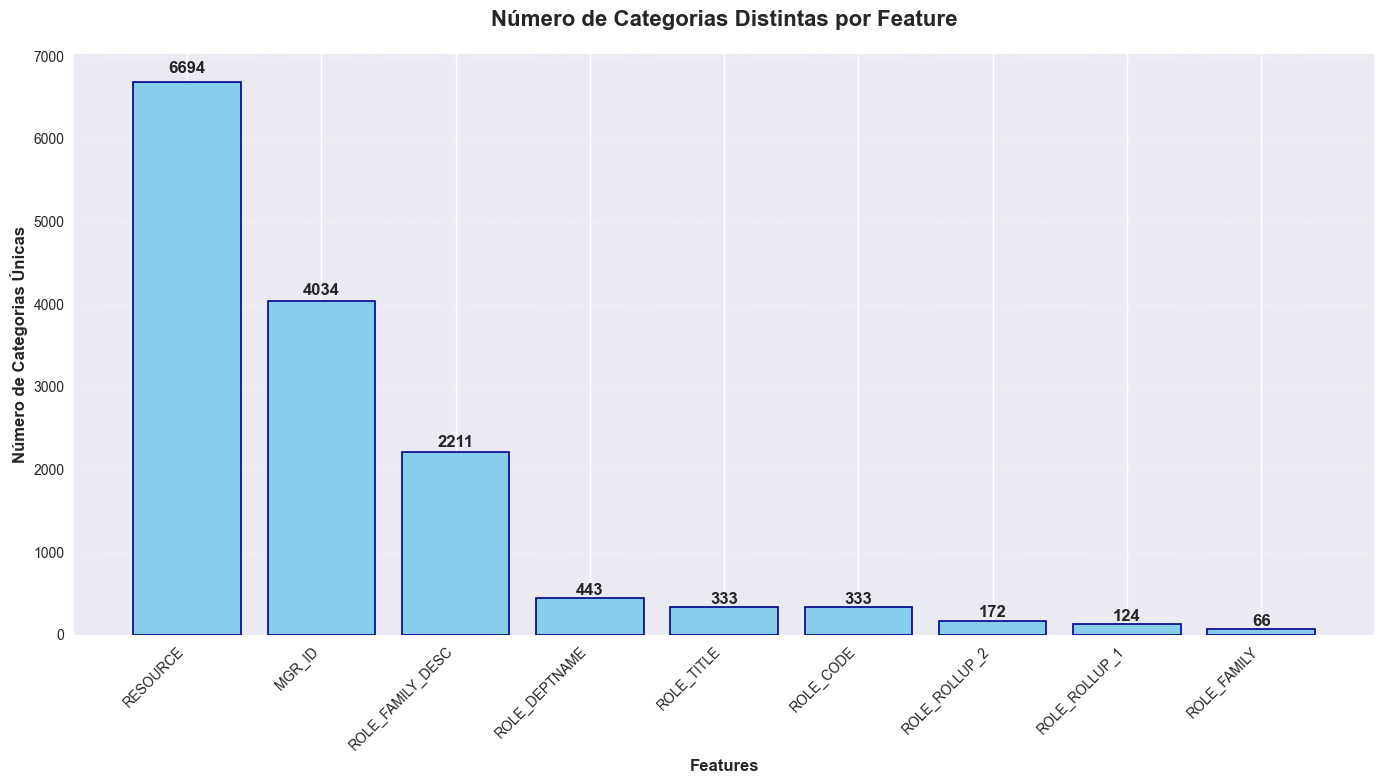


ESTATÍSTICAS DE CARDINALIDADE
Feature com maior cardinalidade: RESOURCE (6694 categorias)
Feature com menor cardinalidade: ROLE_FAMILY (66 categorias)
Cardinalidade média: 1601.1
Cardinalidade mediana: 333.0


In [8]:
# Calcular o número de categorias únicas para cada feature preditiva
features = [col for col in X_train.columns]
cardinality_data = []

for feature in features:
    unique_count = X_train[feature].nunique()
    cardinality_data.append({'Feature': feature, 'Categorias_Unicas': unique_count})

# DataFrame para facilitar a visualização
cardinality_df = pd.DataFrame(cardinality_data)
cardinality_df = cardinality_df.sort_values('Categorias_Unicas', ascending=False)

#  gráfico de barras
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(cardinality_df)), cardinality_df['Categorias_Unicas'], 
               color='skyblue', edgecolor='darkblue', linewidth=1.2)

# Personalizar o gráfico
plt.title('Número de Categorias Distintas por Feature', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12, fontweight='bold')
plt.ylabel('Número de Categorias Únicas', fontsize=12, fontweight='bold')
plt.xticks(range(len(cardinality_df)), cardinality_df['Feature'], rotation=45, ha='right')

# valores no topo de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# grid para melhor visualização
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Ajustar layout
plt.tight_layout()
plt.show()

# estatísticas resumidas
print(f"\nESTATÍSTICAS DE CARDINALIDADE")
print(f"Feature com maior cardinalidade: {cardinality_df.iloc[0]['Feature']} ({cardinality_df.iloc[0]['Categorias_Unicas']} categorias)")
print(f"Feature com menor cardinalidade: {cardinality_df.iloc[-1]['Feature']} ({cardinality_df.iloc[-1]['Categorias_Unicas']} categorias)")
print(f"Cardinalidade média: {cardinality_df['Categorias_Unicas'].mean():.1f}")
print(f"Cardinalidade mediana: {cardinality_df['Categorias_Unicas'].median():.1f}")

### 3.4 Análise bivariada - Relação entre variáveis preditoras e target

ANÁLISE BIVARIADA - VARIÁVEIS vs TARGET

ROLE_ROLLUP_1
Taxa de aprovação por ROLE_ROLLUP_1 (Top 10 mais frequentes):
  117961.0: 95.0% (17064.0 solicitações)
  117902.0: 95.5% (601.0 solicitações)
  91261.0: 96.9% (588.0 solicitações)
  118315.0: 95.0% (402.0 solicitações)
  118212.0: 95.7% (325.0 solicitações)
  118290.0: 89.1% (322.0 solicitações)
  119062.0: 85.6% (313.0 solicitações)
  118887.0: 94.7% (264.0 solicitações)
  117916.0: 92.9% (241.0 solicitações)
  118169.0: 90.0% (229.0 solicitações)


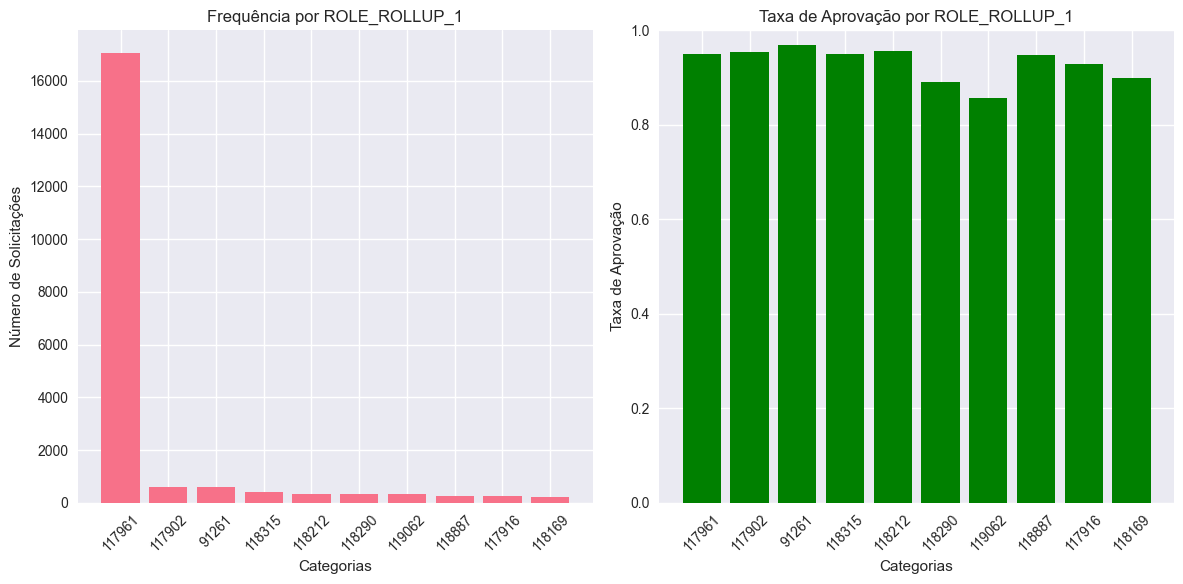


ROLE_ROLLUP_2
Taxa de aprovação por ROLE_ROLLUP_2 (Top 10 mais frequentes):
  118300.0: 95.7% (3536.0 solicitações)
  118343.0: 96.6% (3128.0 solicitações)
  118327.0: 95.5% (2105.0 solicitações)
  118225.0: 95.5% (2043.0 solicitações)
  118386.0: 91.3% (1455.0 solicitações)
  118052.0: 89.4% (1326.0 solicitações)
  117962.0: 95.4% (1236.0 solicitações)
  118413.0: 96.7% (1016.0 solicitações)
  118446.0: 96.9% (785.0 solicitações)
  118026.0: 96.9% (588.0 solicitações)


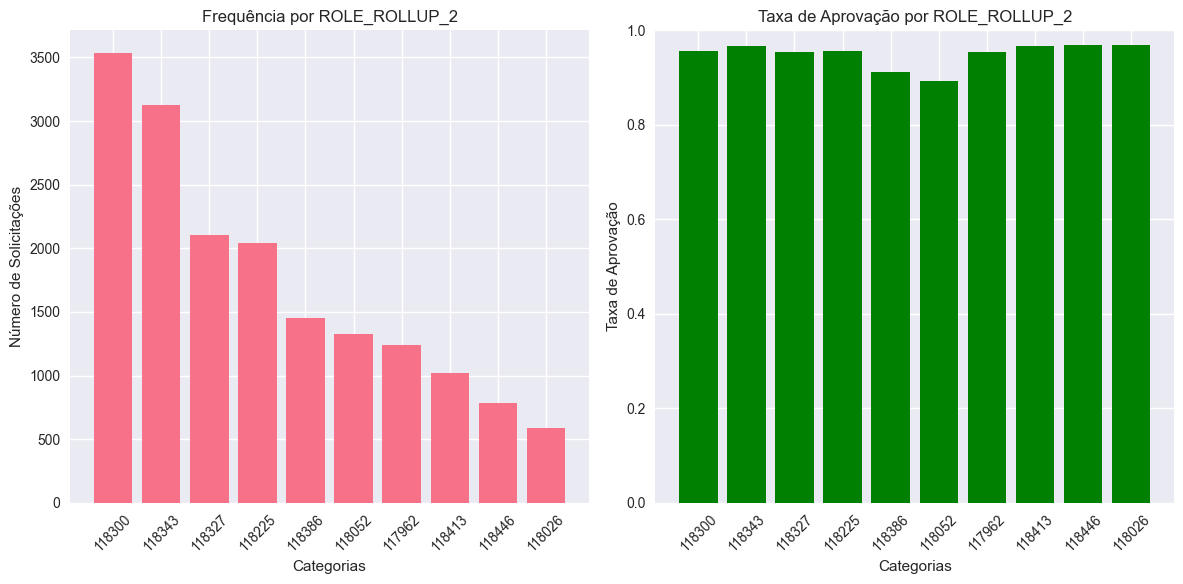


ROLE_DEPTNAME
Taxa de aprovação por ROLE_DEPTNAME (Top 10 mais frequentes):
  117878.0: 93.8% (914.0 solicitações)
  117941.0: 91.8% (597.0 solicitações)
  117945.0: 86.4% (514.0 solicitações)
  118514.0: 98.1% (477.0 solicitações)
  117920.0: 90.6% (457.0 solicitações)
  117884.0: 92.4% (447.0 solicitações)
  119181.0: 97.0% (428.0 solicitações)
  118403.0: 97.6% (424.0 solicitações)
  119598.0: 97.4% (423.0 solicitações)
  120722.0: 97.2% (387.0 solicitações)


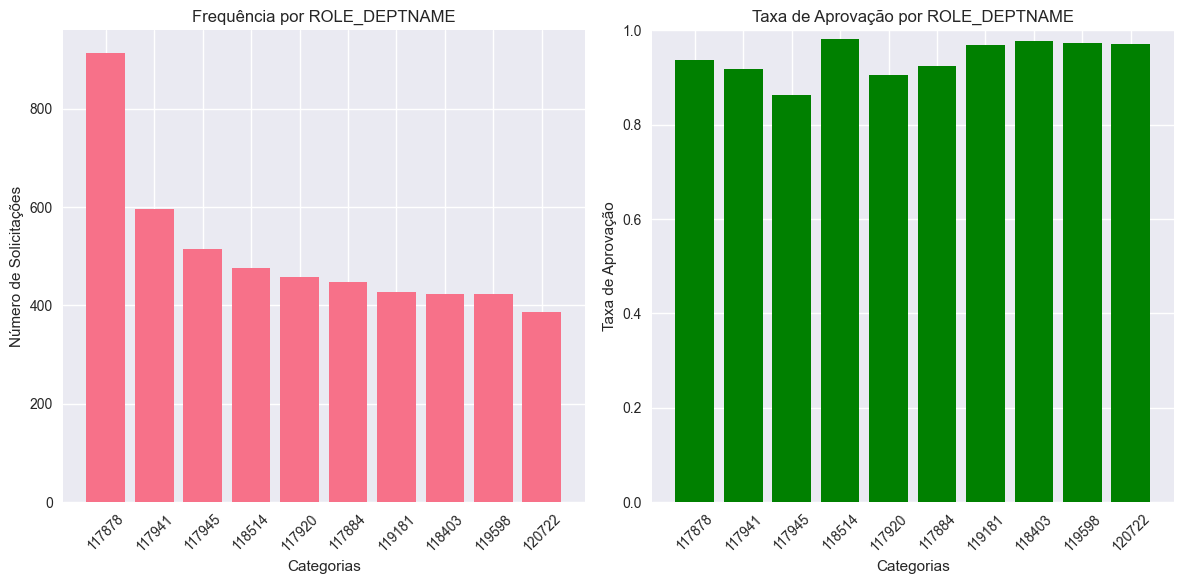


ROLE_TITLE
Taxa de aprovação por ROLE_TITLE (Top 10 mais frequentes):
  118321.0: 92.2% (3726.0 solicitações)
  117905.0: 96.8% (2873.0 solicitações)
  118784.0: 93.0% (1419.0 solicitações)
  117879.0: 88.8% (995.0 solicitações)
  118568.0: 91.9% (815.0 solicitações)
  117885.0: 96.3% (679.0 solicitações)
  118054.0: 96.8% (627.0 solicitações)
  118685.0: 97.1% (483.0 solicitações)
  118777.0: 90.1% (453.0 solicitações)
  118451.0: 96.6% (406.0 solicitações)


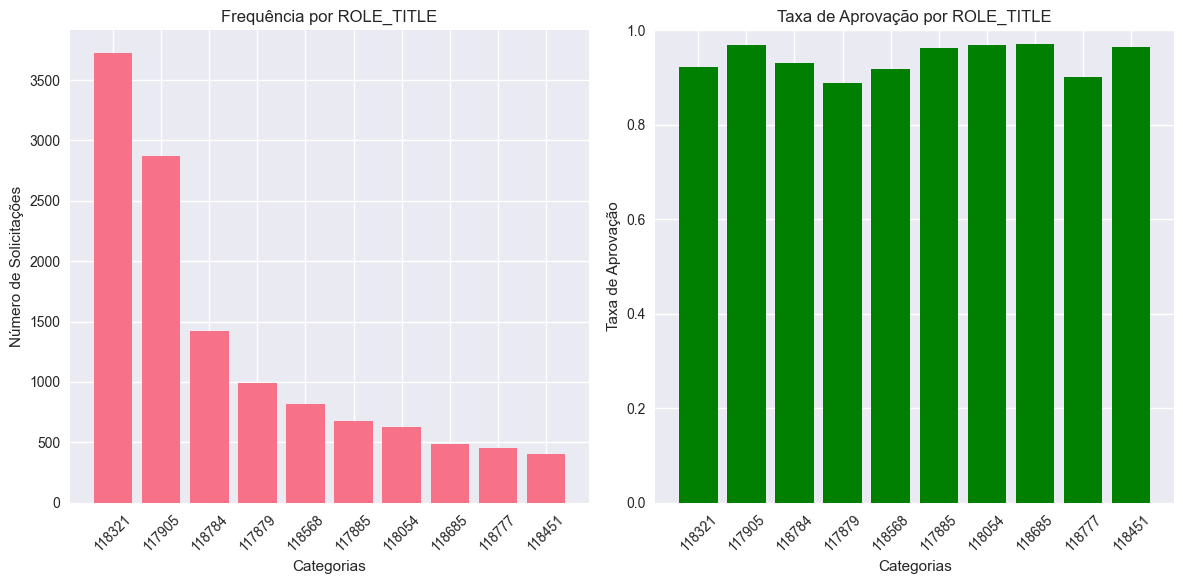


ROLE_FAMILY
Taxa de aprovação por ROLE_FAMILY (Top 10 mais frequentes):
  290919.0: 94.3% (8787.0 solicitações)
  118424.0: 97.2% (2136.0 solicitações)
  19721.0: 90.7% (2078.0 solicitações)
  117887.0: 95.6% (1997.0 solicitações)
  118398.0: 94.9% (1034.0 solicitações)
  308574.0: 94.1% (1028.0 solicitações)
  292795.0: 85.8% (1027.0 solicitações)
  118453.0: 96.7% (725.0 solicitações)
  118331.0: 93.7% (716.0 solicitações)
  118643.0: 96.8% (621.0 solicitações)


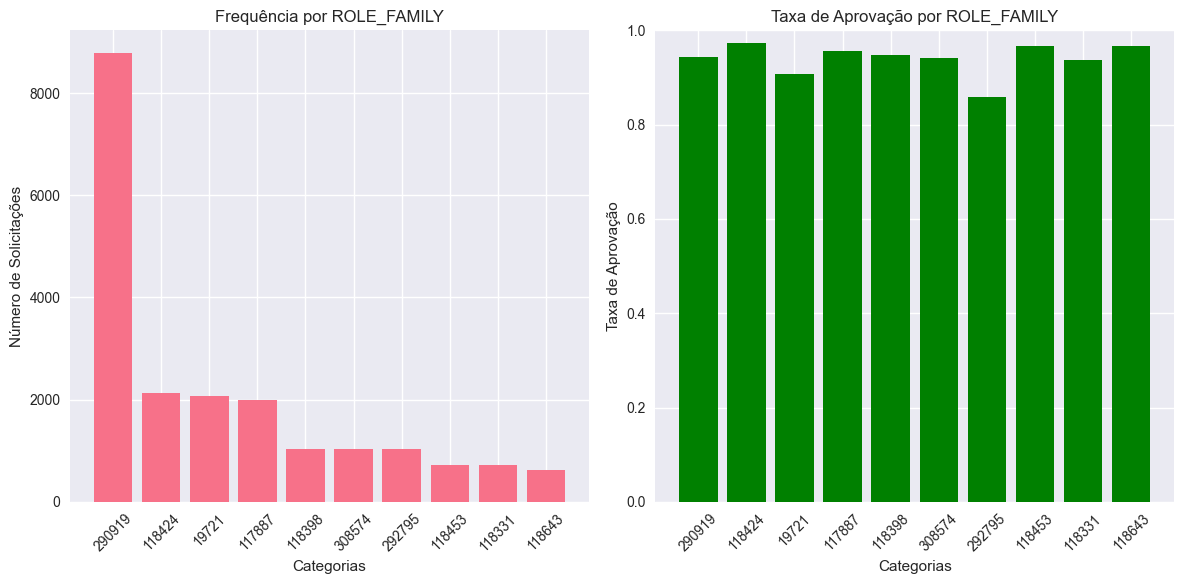

In [12]:
# Análise bivariada - Relação entre variáveis preditoras e target
print("ANÁLISE BIVARIADA - VARIÁVEIS vs TARGET")

# Função para calcular taxa de aprovação por variável
def analyze_approval_rate(df, var_name, top_n=10):
    """
    Calcula a taxa de aprovação para os top N valores de uma variável
    """
    approval_rates = df.groupby(var_name)['ACTION'].agg(['count', 'mean']).reset_index()
    approval_rates.columns = [var_name, 'total_requests', 'approval_rate']
    approval_rates = approval_rates.sort_values('total_requests', ascending=False).head(top_n)
    return approval_rates

# Juntar X_train e y_train para análise
train_analysis_df = X_train.copy()
train_analysis_df['ACTION'] = y_train

variables_to_analyze = [var for var in categorical_vars if X_train[var].nunique() <= 500]

for var in variables_to_analyze[:5]:  # Analisar apenas as primeiras 5 variáveis
    print(f"\n{var}")
    approval_rates = analyze_approval_rate(train_analysis_df, var)
    
    print(f"Taxa de aprovação por {var} (Top 10 mais frequentes):")
    for _, row in approval_rates.iterrows():
        print(f"  {row[var]}: {row['approval_rate']:.1%} ({row['total_requests']} solicitações)")
    
    # Visualização
    if len(approval_rates) > 2:
        plt.figure(figsize=(12, 6))
        
        # Gráfico de barras para contagem
        plt.subplot(1, 2, 1)
        plt.bar(range(len(approval_rates)), approval_rates['total_requests'])
        plt.title(f'Frequência por {var}')
        plt.xlabel('Categorias')
        plt.ylabel('Número de Solicitações')
        plt.xticks(range(len(approval_rates)), approval_rates[var], rotation=45)
        
        # Gráfico de barras para taxa de aprovação
        plt.subplot(1, 2, 2)
        colors = ['red' if rate < 0.5 else 'green' for rate in approval_rates['approval_rate']]
        plt.bar(range(len(approval_rates)), approval_rates['approval_rate'], color=colors)
        plt.title(f'Taxa de Aprovação por {var}')
        plt.xlabel('Categorias')
        plt.ylabel('Taxa de Aprovação')
        plt.xticks(range(len(approval_rates)), approval_rates[var], rotation=45)
        plt.ylim(0, 1)
        
        plt.tight_layout()
        plt.show()

### 3.5 Análise Matriz de Correlação

<Axes: >

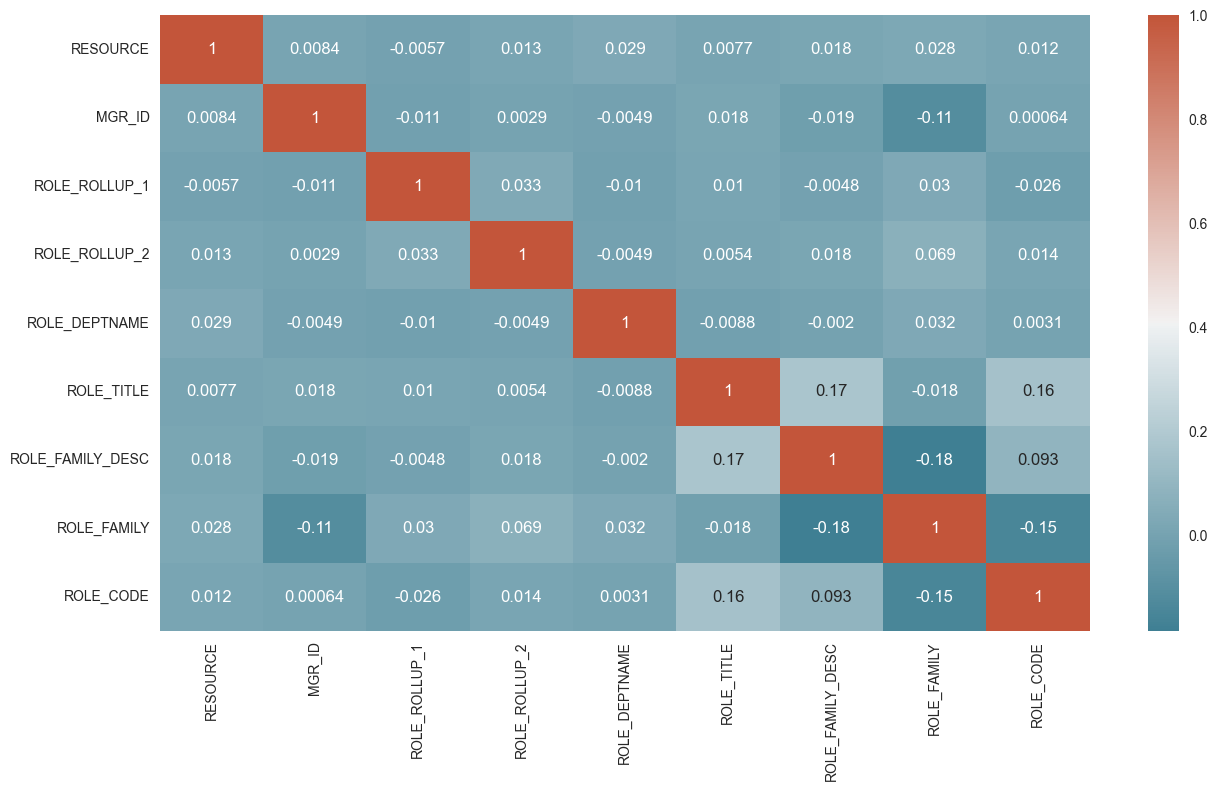

In [ ]:
plt.figure(figsize=(15,8))
corr = X_train.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

### 3.6 Análise da Proporção Por Classe em Cada Feature


ANÁLISE DE CLASSES PARA: RESOURCE

ESTATÍSTICAS GERAIS:
   • Total de categorias: 6694
   • Categorias com < 10 registros: 6289
   • Categorias desbalanceadas (>90% ou <10% de uma classe): 6174


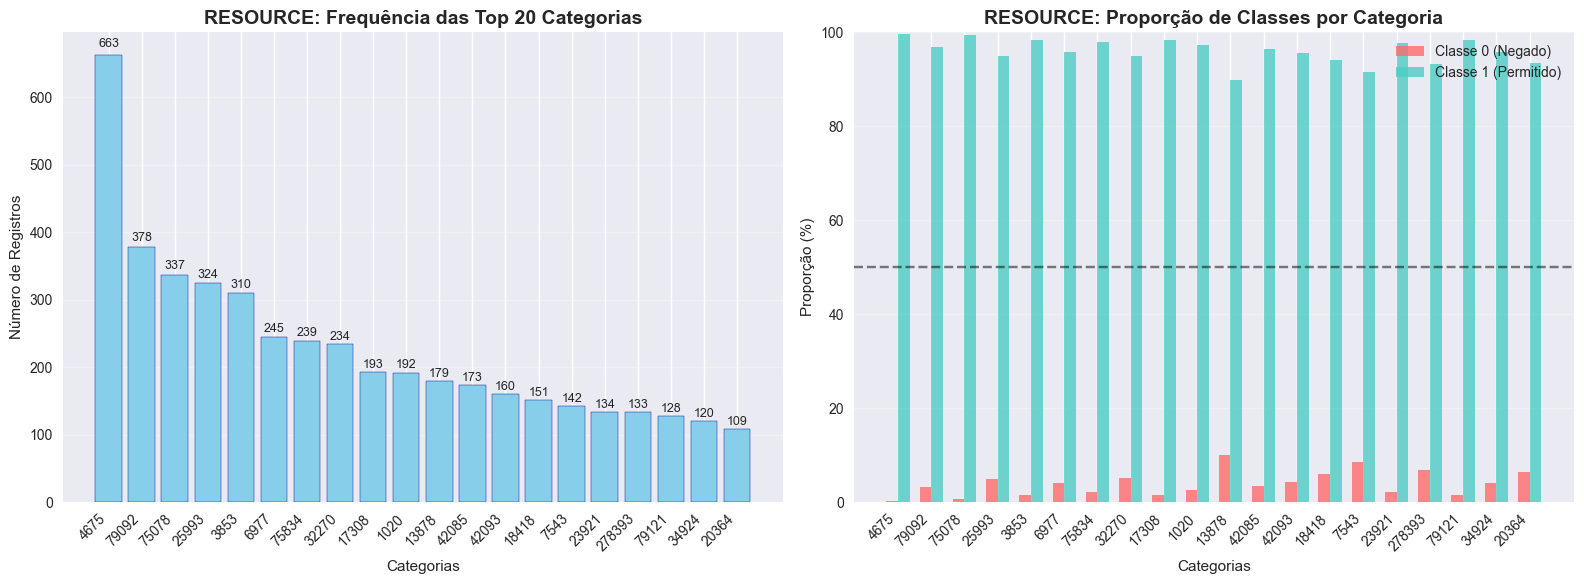


ANÁLISE DE CLASSES PARA: MGR_ID

ESTATÍSTICAS GERAIS:
   • Total de categorias: 4034
   • Categorias com < 10 registros: 3190
   • Categorias desbalanceadas (>90% ou <10% de uma classe): 3548


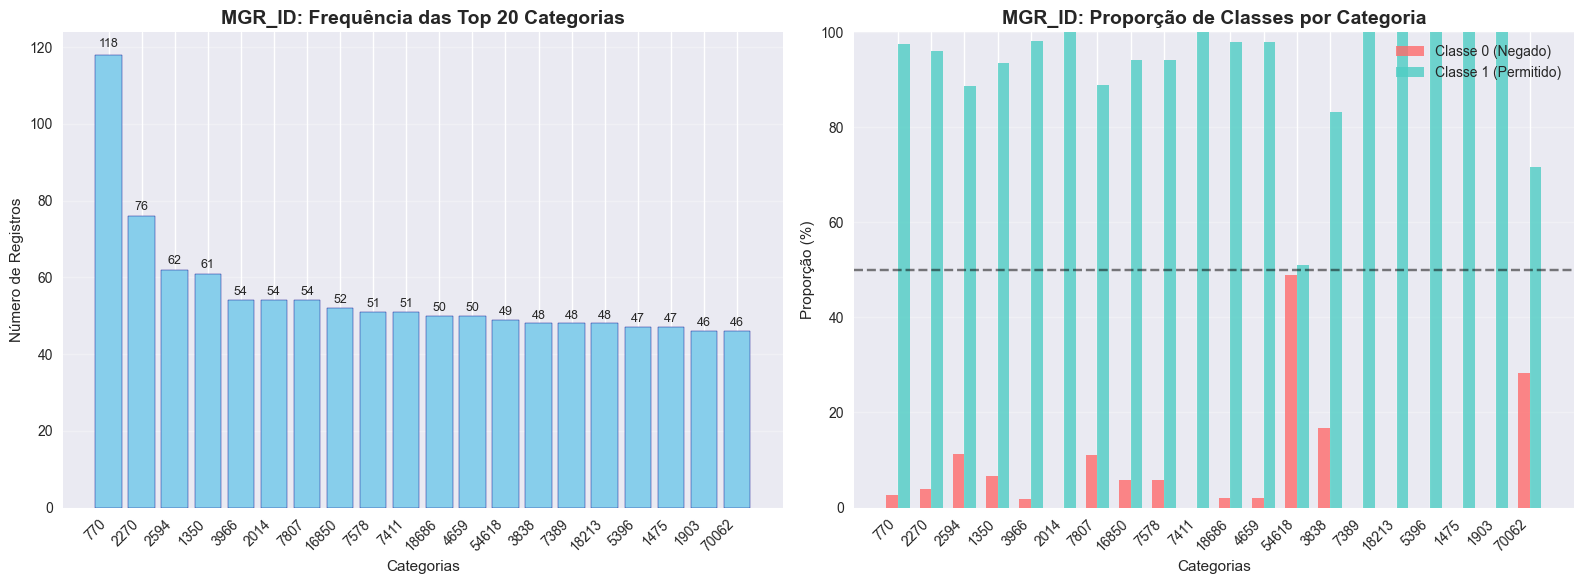


ANÁLISE DE CLASSES PARA: ROLE_ROLLUP_1

ESTATÍSTICAS GERAIS:
   • Total de categorias: 124
   • Categorias com < 10 registros: 24
   • Categorias desbalanceadas (>90% ou <10% de uma classe): 101


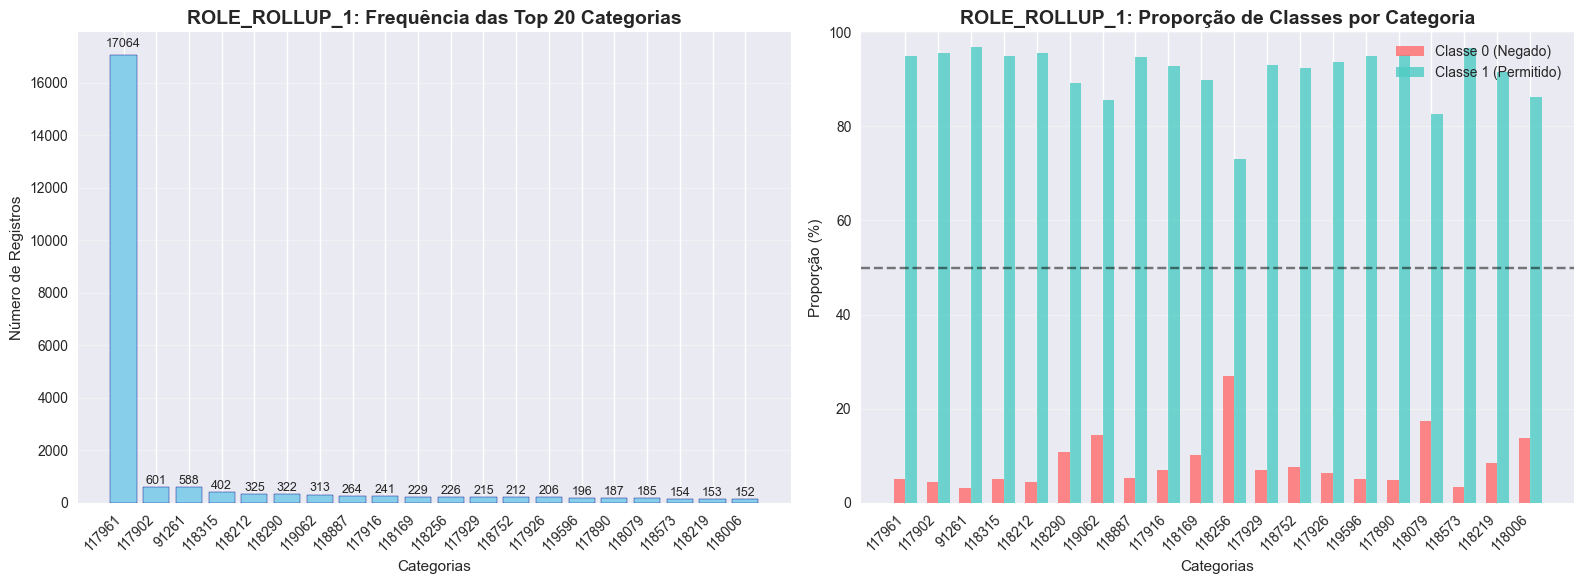


ANÁLISE DE CLASSES PARA: ROLE_ROLLUP_2

ESTATÍSTICAS GERAIS:
   • Total de categorias: 172
   • Categorias com < 10 registros: 45
   • Categorias desbalanceadas (>90% ou <10% de uma classe): 139


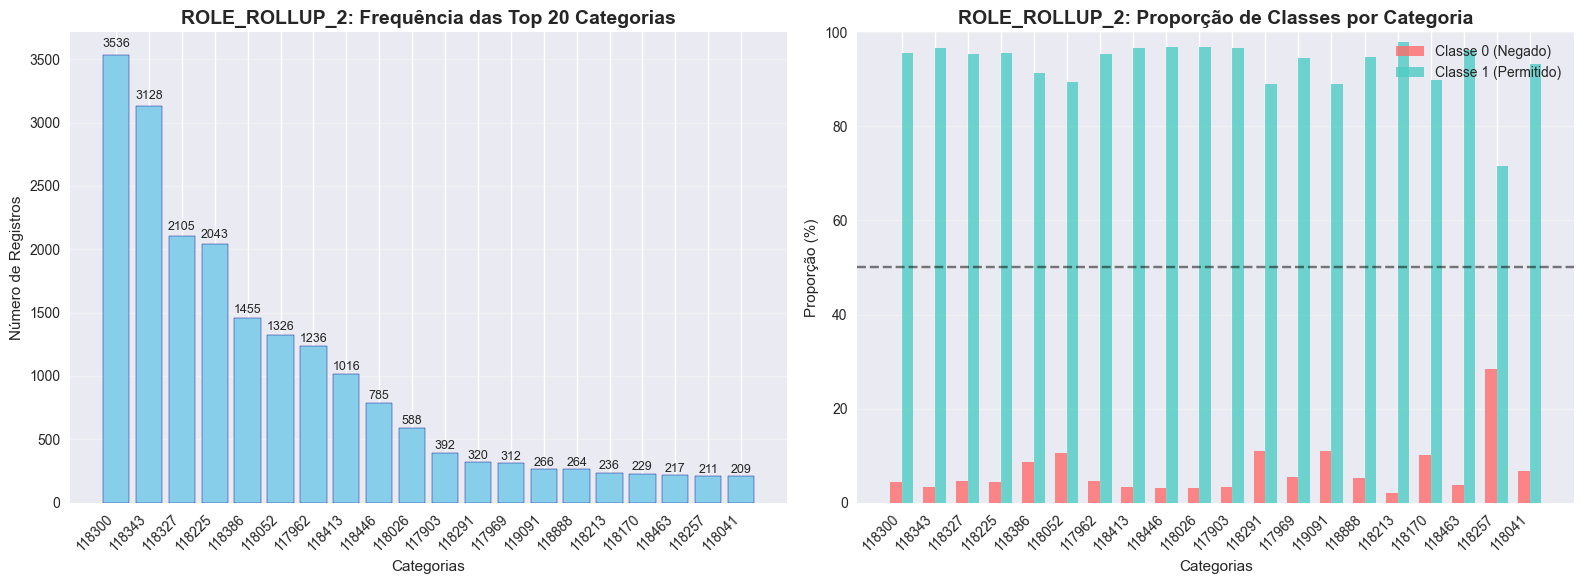


ANÁLISE DE CLASSES PARA: ROLE_DEPTNAME

ESTATÍSTICAS GERAIS:
   • Total de categorias: 443
   • Categorias com < 10 registros: 135
   • Categorias desbalanceadas (>90% ou <10% de uma classe): 355


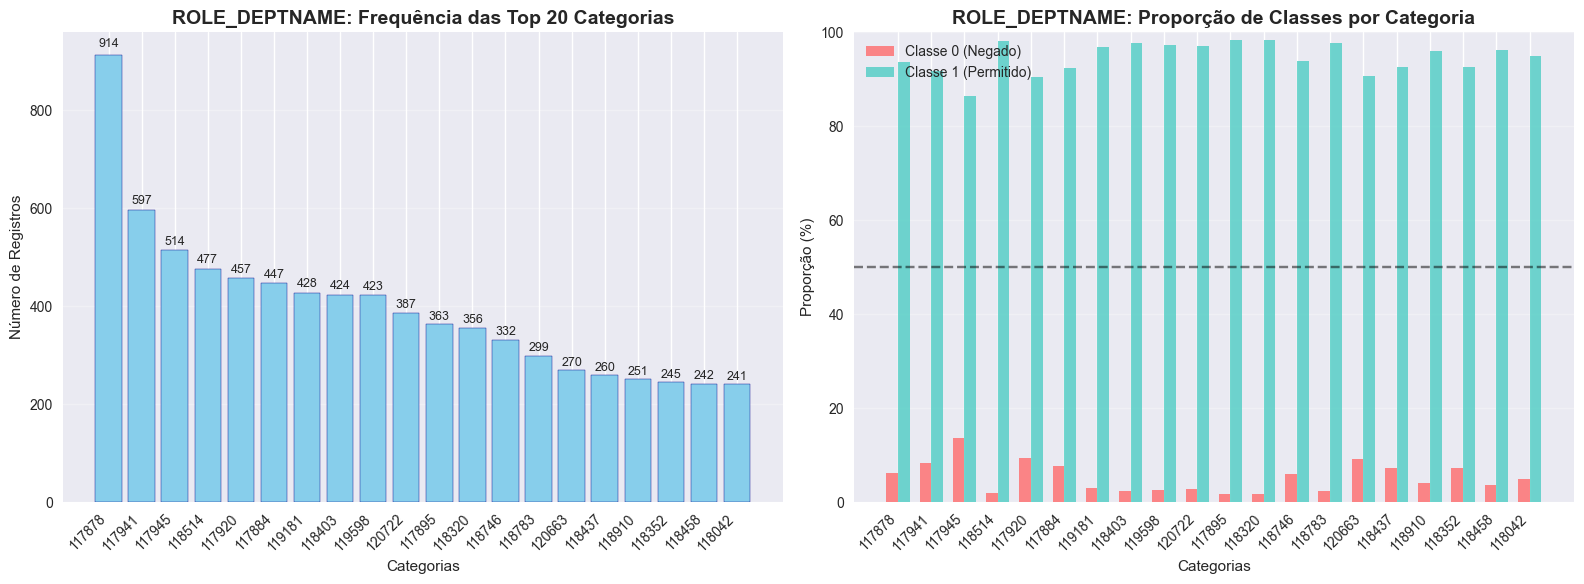


ANÁLISE DE CLASSES PARA: ROLE_TITLE

ESTATÍSTICAS GERAIS:
   • Total de categorias: 333
   • Categorias com < 10 registros: 139
   • Categorias desbalanceadas (>90% ou <10% de uma classe): 290


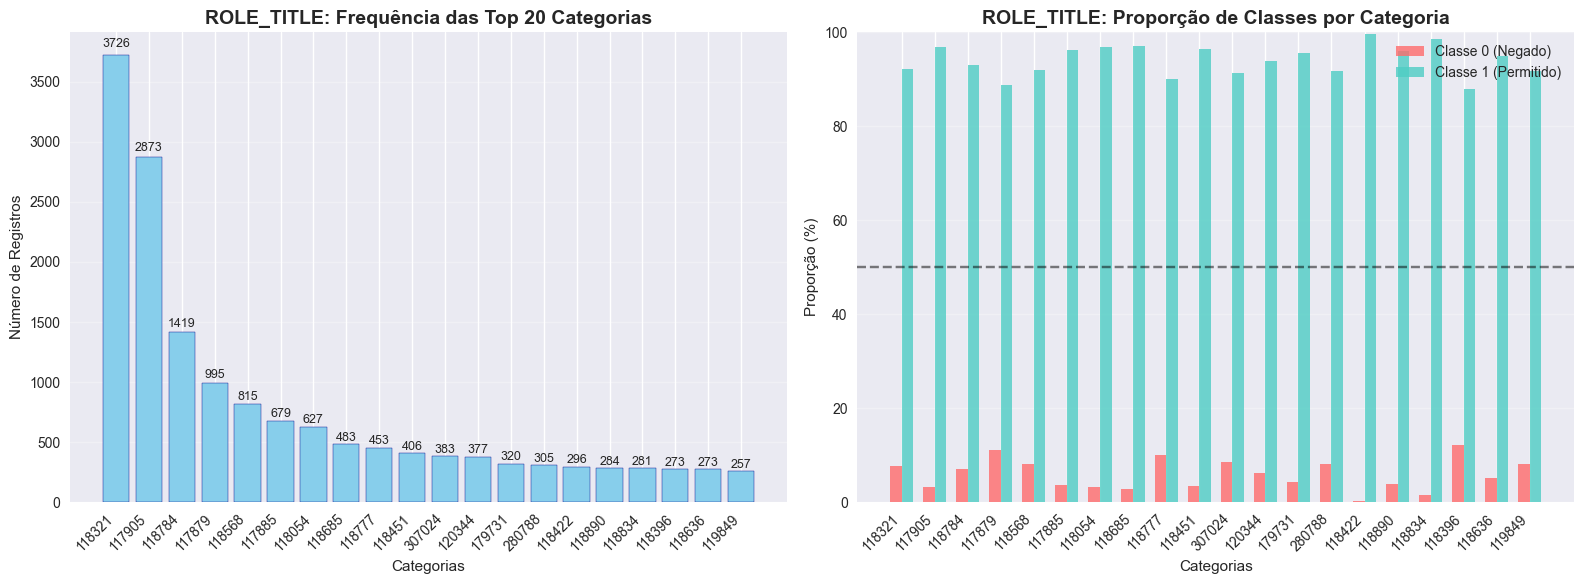


ANÁLISE DE CLASSES PARA: ROLE_FAMILY_DESC

ESTATÍSTICAS GERAIS:
   • Total de categorias: 2211
   • Categorias com < 10 registros: 1852
   • Categorias desbalanceadas (>90% ou <10% de uma classe): 2003


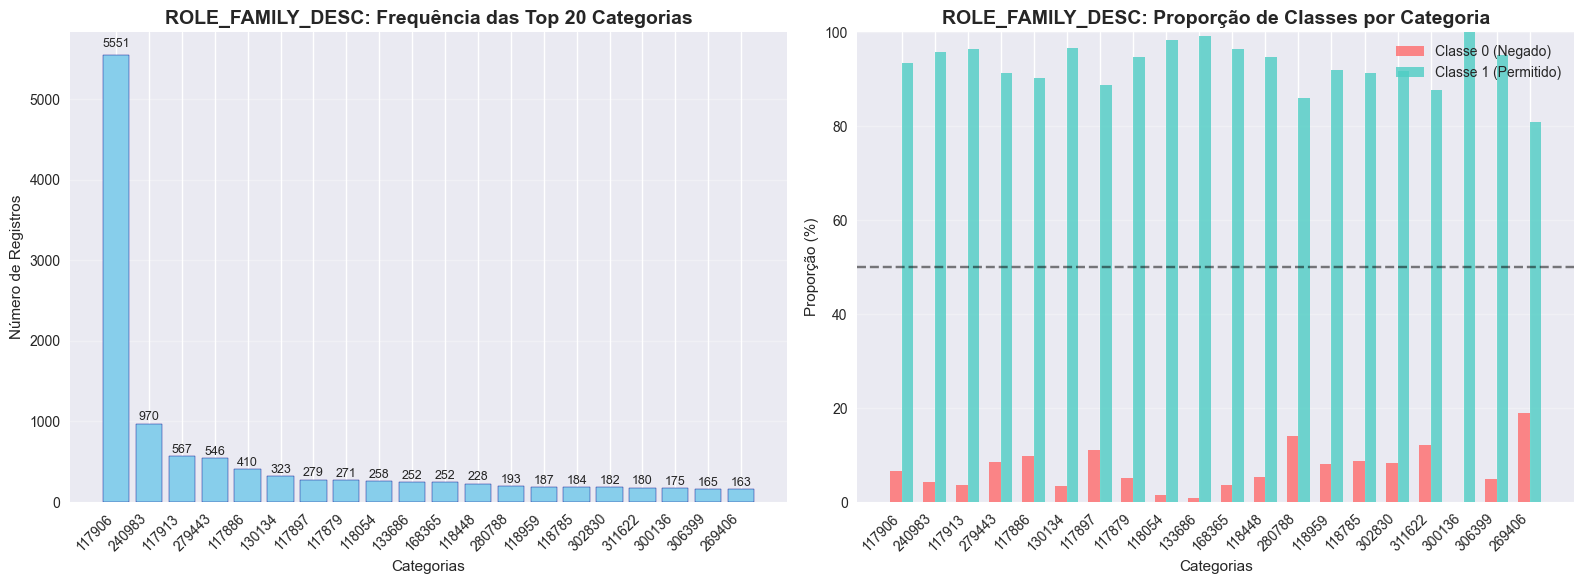


ANÁLISE DE CLASSES PARA: ROLE_FAMILY

ESTATÍSTICAS GERAIS:
   • Total de categorias: 66
   • Categorias com < 10 registros: 16
   • Categorias desbalanceadas (>90% ou <10% de uma classe): 58


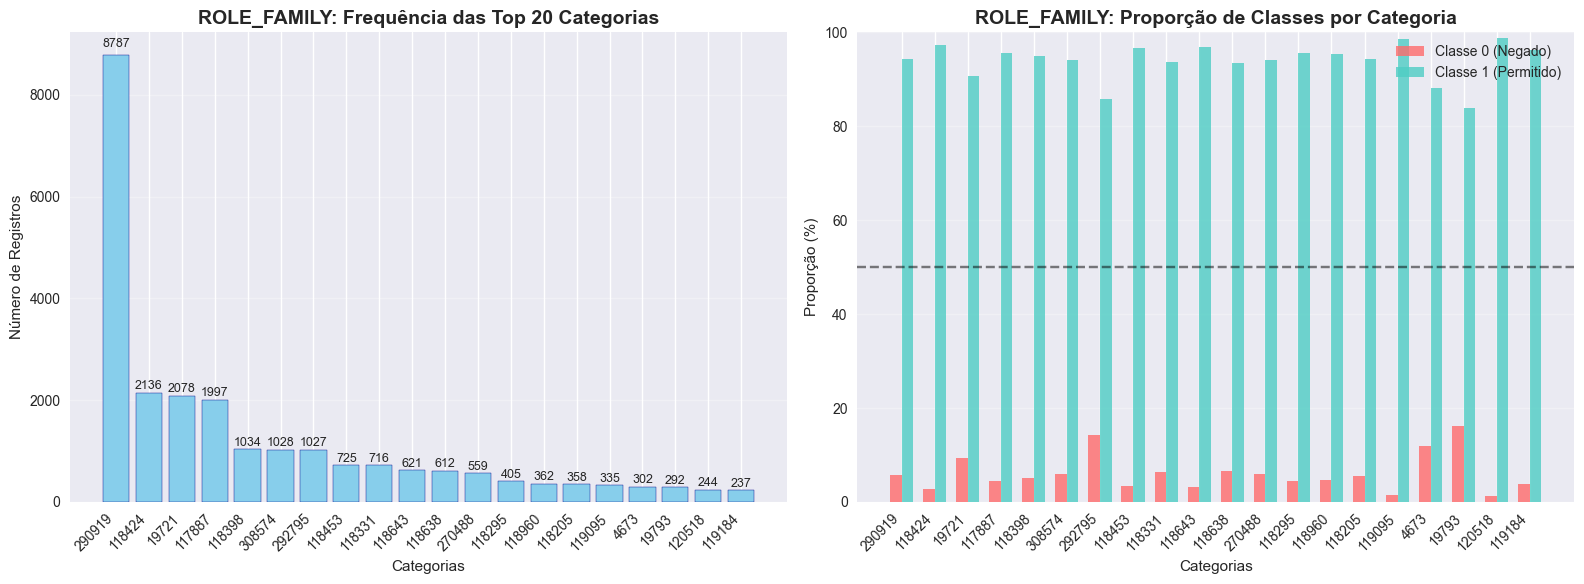


ANÁLISE DE CLASSES PARA: ROLE_CODE

ESTATÍSTICAS GERAIS:
   • Total de categorias: 333
   • Categorias com < 10 registros: 139
   • Categorias desbalanceadas (>90% ou <10% de uma classe): 290


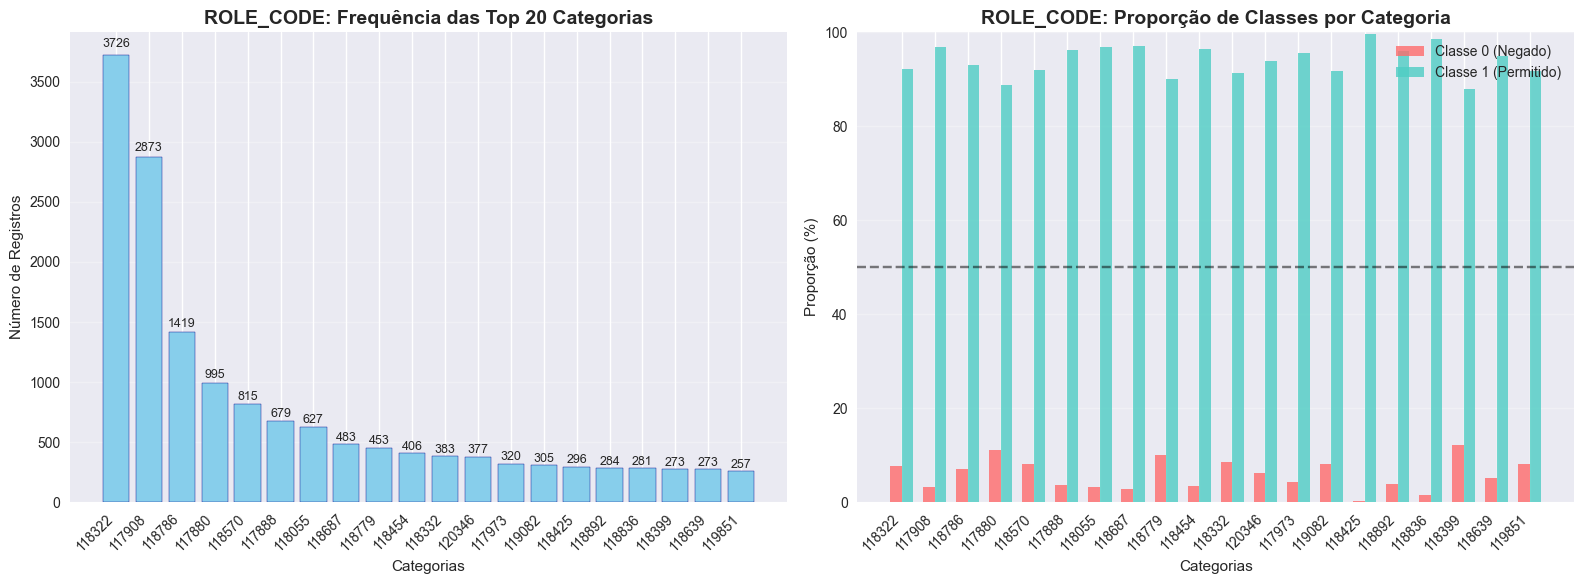


RESUMO CONSOLIDADO

RESUMO POR VARIÁVEL:
Variável        Total    Pouca Repr   %Pouca Repr  Reg Pouca    %Reg Pouca   Desbal   %Desbal 


RESOURCE        6694     6289         93.9         12668        48.32        6174     92.2    
MGR_ID          4034     3190         79.1         10544        40.22        3548     88.0    
ROLE_FAMILY_DESC 2211     1852         83.8         5520         21.06        2003     90.6    
ROLE_TITLE      333      139          41.7         568          2.17         290      87.1    
ROLE_CODE       333      139          41.7         568          2.17         290      87.1    
ROLE_DEPTNAME   443      135          30.5         559          2.13         355      80.1    
ROLE_ROLLUP_2   172      45           26.2         182          0.69         139      80.8    
ROLE_ROLLUP_1   124      24           19.4         101          0.39         101      81.5    
ROLE_FAMILY     66       16           24.2         57           0.22         58       87.9    


In [13]:
def analyze_class_representation(df, col, target_col='ACTION', min_samples=10):
    """
    Analisa a representação de classes dentro de cada categoria
    """
    # Crosstab para ver distribuição de classes por categoria
    crosstab = pd.crosstab(df[col], df[target_col], margins=True)
    
    # Calcular proporções - só para categorias, não para o total
    props = pd.crosstab(df[col], df[target_col], normalize='index') * 100
    
    # Garantir que temos ambas as classes (0 e 1) no crosstab
    if 0 not in crosstab.columns:
        crosstab = crosstab.copy()
        crosstab[0] = 0
    if 1 not in crosstab.columns:
        crosstab = crosstab.copy()
        crosstab[1] = 0
    
    # Garantir que temos ambas as classes (0 e 1) no props
    if 0 not in props.columns:
        props = props.copy()
        props[0] = 0.0
    if 1 not in props.columns:
        props = props.copy()
        props[1] = 0.0
    
    # Reordenar colunas para garantir ordem consistente
    crosstab = crosstab[[0, 1, 'All']]
    props = props[[0, 1]]
    
    # Remover a linha 'All' do crosstab e props
    crosstab_categories = crosstab.drop('All', axis=0)
    props_categories = props.drop('All', axis=0) if 'All' in props.index else props
    
    # Garantir que ambos têm o mesmo índice
    common_index = crosstab_categories.index.intersection(props_categories.index)
    crosstab_categories = crosstab_categories.loc[common_index]
    props_categories = props_categories.loc[common_index]
    
    # Combinar contagem e proporções
    analysis = pd.DataFrame({
        'categoria': common_index,
        'total_registros': crosstab_categories['All'].values,
        'classe_0_count': crosstab_categories[0].values,
        'classe_1_count': crosstab_categories[1].values,
        'classe_0_prop': props_categories[0].values,
        'classe_1_prop': props_categories[1].values
    })
    
    # Identificar categorias com pouca representação
    low_representation = analysis[analysis['total_registros'] < min_samples]
    
    # Identificar categorias com classes desbalanceadas
    imbalanced = analysis[
        (analysis['classe_0_prop'] < 10) | (analysis['classe_0_prop'] > 90)
    ]
    
    return analysis, low_representation, imbalanced

# Análise para cada variável categórica
categorical_analysis = {}
for col in categorical_vars:  # Todas as variáveis categóricas
    print(f"\nANÁLISE DE CLASSES PARA: {col}")
    
    analysis, low_rep, imbalanced = analyze_class_representation(train_analysis_df, col)
    categorical_analysis[col] = {
        'analysis': analysis,
        'low_representation': low_rep,
        'imbalanced': imbalanced
    }
    
    # Estatísticas gerais (simplificadas)
    print(f"\nESTATÍSTICAS GERAIS:")
    print(f"   • Total de categorias: {len(analysis)}")
    print(f"   • Categorias com < 10 registros: {len(low_rep)}")
    print(f"   • Categorias desbalanceadas (>90% ou <10% de uma classe): {len(imbalanced)}")
    
    # Visualização - Top 20 categorias mais frequentes
    top_20 = analysis.sort_values('total_registros', ascending=False).head(20)
    
    # Criar gráficos lado a lado
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Gráfico 1: Frequência das categorias
    ax1 = axes[0]
    bars = ax1.bar(range(len(top_20)), top_20['total_registros'], color='skyblue', edgecolor='darkblue')
    ax1.set_title(f'{col}: Frequência das Top 20 Categorias', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Categorias')
    ax1.set_ylabel('Número de Registros')
    ax1.set_xticks(range(len(top_20)))
    ax1.set_xticklabels([str(x) for x in top_20['categoria']], rotation=45, ha='right')
    ax1.grid(axis='y', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)
    
    # Gráfico 2: Proporção de classes por categoria
    ax2 = axes[1]
    width = 0.35
    x = np.arange(len(top_20))
    
    bars1 = ax2.bar(x - width/2, top_20['classe_0_prop'], width, 
                   label='Classe 0 (Negado)', color='#FF6B6B', alpha=0.8)
    bars2 = ax2.bar(x + width/2, top_20['classe_1_prop'], width, 
                   label='Classe 1 (Permitido)', color='#4ECDC4', alpha=0.8)
    
    ax2.set_title(f'{col}: Proporção de Classes por Categoria', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Categorias')
    ax2.set_ylabel('Proporção (%)')
    ax2.set_xticks(x)
    ax2.set_xticklabels([str(x) for x in top_20['categoria']], rotation=45, ha='right')
    ax2.legend()
    ax2.set_ylim(0, 100)
    ax2.grid(axis='y', alpha=0.3)
    
    # Adicionar linha de referência em 50%
    ax2.axhline(y=50, color='black', linestyle='--', alpha=0.5, label='Balanceamento (50%)')
    
    plt.tight_layout()
    plt.show()

# Criar resumo consolidado
print("\nRESUMO CONSOLIDADO")

summary_data = []
for var, data in categorical_analysis.items():
    analysis = data['analysis']
    low_rep = data['low_representation']
    imbalanced = data['imbalanced']
    
    summary_data.append({
        'variavel': var,
        'total_categorias': len(analysis),
        'categorias_pouca_repr': len(low_rep),
        'perc_pouca_repr': (len(low_rep) / len(analysis)) * 100,
        'registros_pouca_repr': low_rep['total_registros'].sum(),
        'perc_registros_pouca_repr': (low_rep['total_registros'].sum() / len(X_train)) * 100,
        'categorias_desbalanceadas': len(imbalanced),
        'perc_desbalanceadas': (len(imbalanced) / len(analysis)) * 100
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('perc_registros_pouca_repr', ascending=False)

print("\nRESUMO POR VARIÁVEL:")
print(f"{'Variável':<15} {'Total':<8} {'Pouca Repr':<12} {'%Pouca Repr':<12} {'Reg Pouca':<12} {'%Reg Pouca':<12} {'Desbal':<8} {'%Desbal':<8}")
print('\n')
for _, row in summary_df.iterrows():
    print(f"{row['variavel']:<15} {row['total_categorias']:<8} "
          f"{row['categorias_pouca_repr']:<12} {row['perc_pouca_repr']:<12.1f} "
          f"{row['registros_pouca_repr']:<12} {row['perc_registros_pouca_repr']:<12.2f} "
          f"{row['categorias_desbalanceadas']:<8} {row['perc_desbalanceadas']:<8.1f}")

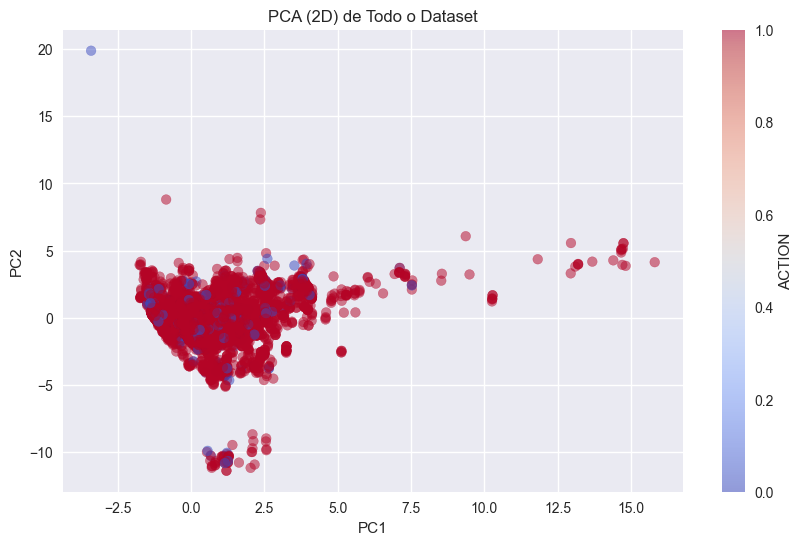

Variância explicada por PC1: 15.57%
Variância explicada por PC2: 12.26%
Variância total explicada pelos 2 componentes: 27.82%


In [ ]:
# Padronizar todo o dataset (X)
scaler_full = StandardScaler()
X_scaled_full = scaler_full.fit_transform(X_train)

# Aplicar PCA para 2 componentes em todo o dataset
pca_full = PCA(n_components=2, random_state=42)
X_pca_full_2d = pca_full.fit_transform(X_scaled_full)

# Plot PCA de todo o dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_pca_full_2d[:, 0], X_pca_full_2d[:, 1], c=y_train, cmap='coolwarm', alpha=0.5)
plt.title('PCA (2D) de Todo o Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(label='ACTION')
plt.show()
explained_variance = pca_full.explained_variance_ratio_

print(f"Variância explicada por PC1: {explained_variance[0]:.2%}")
print(f"Variância explicada por PC2: {explained_variance[1]:.2%}")
print(f"Variância total explicada pelos 2 componentes: {explained_variance.sum():.2%}")

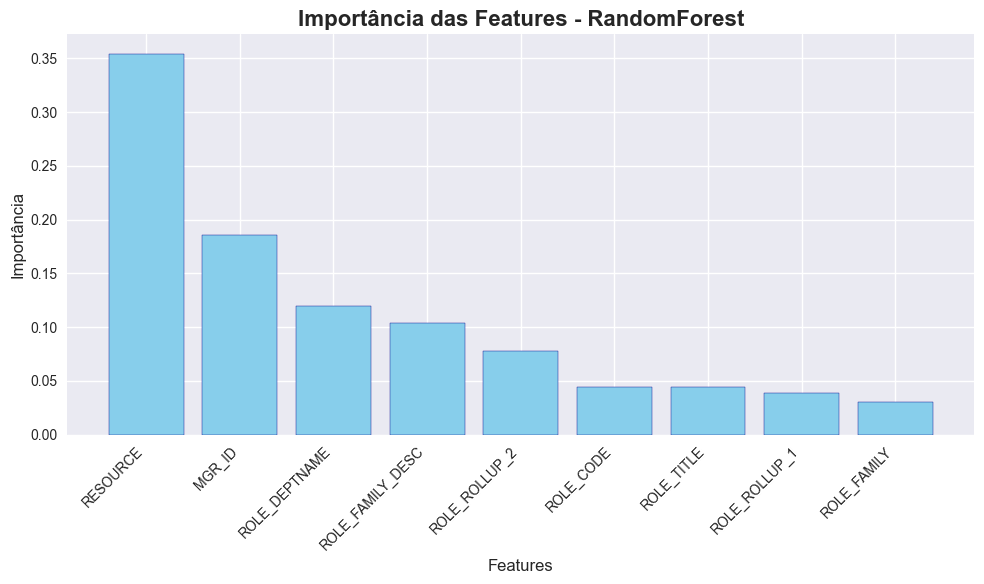

In [ ]:
# Treinar o modelo no conjunto de treino original
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Obter importâncias das features
importances = rf_model.feature_importances_
feature_names = X_train.columns
indices = importances.argsort()[::-1]

# Plotar gráfico de importância das features
plt.figure(figsize=(10, 6))
plt.title("Importância das Features - RandomForest", fontsize=16, fontweight='bold')
bars = plt.bar(range(len(importances)), importances[indices], color='skyblue', edgecolor='darkblue')
plt.xticks(range(len(importances)), feature_names[indices], rotation=45, ha='right')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importância", fontsize=12)
plt.tight_layout()
plt.show()

## 4. Conclusões e Próximos Passos

### 4.1 Principais Descobertas

#### **Qualidade dos Dados**
- **Dados Limpos**: Nenhum valor ausente ou duplicado encontrado
- **Estrutura Consistente**: 9 features categóricas com 26.215 registros de treino
- **Tipos Apropriados**: Todas as variáveis são categóricas ordinais (int64)

#### **Distribuição da Variável Target**
- **Desbalanceamento considerável**: 94,0% Acesso Permitido vs 6,0% Acesso Negado
- **Implicação**: Necessário tratamento especial para lidar com o desbalanceamento de classes
- **Estratégia**: Aplicação de técnicas como NeighbourhoodCleaningRule demonstrou-se eficaz

#### **Cardinalidade das Features**
- **Alta Variabilidade**: Cardinalidade varia de 7 a 2.358 categorias por feature
- **Features de Alta Cardinalidade**: `RESOURCE` (7.518), `MGR_ID` (4.243), `ROLE_TITLE` (2.358)
- **Features de Baixa Cardinalidade**: `ROLE_FAMILY_DESC` (67), `ROLE_FAMILY` (67), `ROLE_DEPTNAME` (59)

#### **Padrões Bivariados Identificados**
- **Variação Significativa**: Taxa de aprovação varia drasticamente entre categorias da mesma feature
- **Categorias Críticas**: Algumas categorias apresentam 100% de rejeição, outras 100% de aprovação
- **Poder Preditivo**: Features demonstram forte correlação com a variável target

#### **Análise de Representação**
- **Categorias Raras**: Múltiplas features possuem categorias com menos de 10 registros
- **Desbalanceamento Interno**: Muitas categorias apresentam distribuição extremamente desbalanceada entre classes
- **Necessidade de Agregação**: Categorias com baixa representação requerem tratamento especial

### 4.2 Preparação para Modelagem

#### **Estratégias de Pré-processamento Definidas**
1. **Encoding Diferenciado**:
   - `OneHotEncoder` para features de baixa cardinalidade (< 450 categorias)
   - `TargetEncoder` para features de alta cardinalidade (≥ 450 categorias)

2. **Tratamento de Desbalanceamento**:
   - `NeighbourhoodCleaningRule` para reduzir exemplos da classe majoritária
   - Melhoria no balanceamento das classes